In [427]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Ridge
from sklearn import preprocessing


In [428]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

df.corr() provides the pearson correlation,
model.score(x[:, np.newaxis], y) gives the R square coefficient

# Chicago cases over time

In [429]:
def func(x, a, b, c):
     return a * np.exp(-b * x) + c

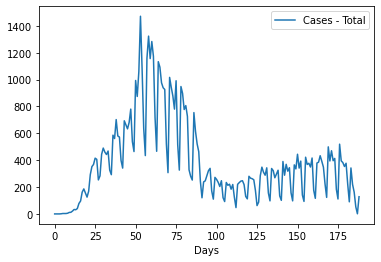

In [430]:
series = pd.read_csv('Data/Chicago_Cases.csv')
series.plot()
plt.xlabel("Days")
plt.show()

# Chicago DP over time

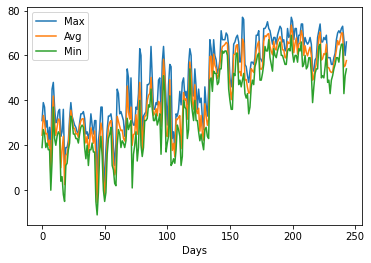

In [431]:
dseries = pd.read_csv('Data/Chicago_DP_Info.csv')
dseries.plot()
plt.xlabel("Days")
plt.show()

# Analysis of chicago without delay.

In [432]:
df = pd.read_csv('Data/Chicago_final.csv')
y = df['Cases-Total']
x = df['Avg_DP']
df.tail()


,Date,Cases-Total,Avg_DP
179,8/27/2020,353,70.0
180,8/28/2020,377,70.0
181,8/29/2020,222,54.9
182,8/30/2020,90,55.4
183,8/31/2020,342,57.7


In [433]:
df.describe()

,Cases-Total,Avg_DP
count,184.000000,184.000000
mean,391.456522,49.467935
std,305.820491,15.185919
min,0.000000,14.900000
25%,181.250000,36.075000
50%,327.000000,53.100000
75%,475.000000,62.425000
max,1471.000000,73.500000


In [434]:
df.corr() # Pearson Correlation

,Cases-Total,Avg_DP
Cases-Total,1.00000,-0.19289
Avg_DP,-0.19289,1.00000


Text(0, 0.5, 'Cases')

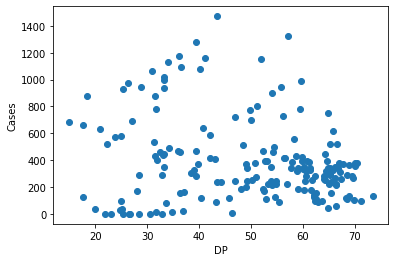

In [435]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-436-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


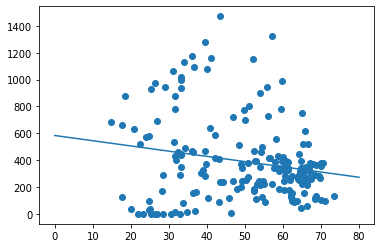

In [436]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-437-7c8942008501>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


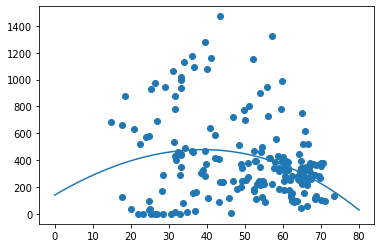

In [437]:
scaler = preprocessing.StandardScaler()
degree=3
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [438]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-438-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.06452478199782985

<ipython-input-439-c5886cd2b1c0>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


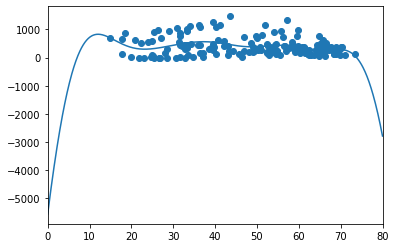

In [439]:
gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [440]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-440-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.1019485616871244

<AxesSubplot:>

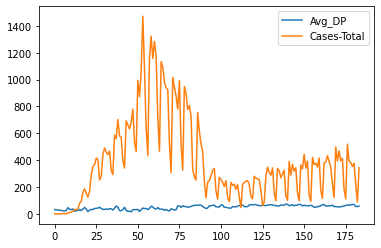

In [441]:
data_plot = df.loc[:,["Avg_DP","Cases-Total"]]
data_plot.plot()

# Analysis of chicgo with a delay of 2 days

**The dates in the data refer to the total cases and the DP values are associated with the delay (2,7,14) or past date values**

In [442]:
df = pd.read_csv('Data/Chicago_Final_D2.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.tail()


,Date-1,Avg_DP,Date,Cases - Total
179,8/25/2020,64.7,8/27/2020,353
180,8/26/2020,67.0,8/28/2020,377
181,8/27/2020,70.0,8/29/2020,222
182,8/28/2020,70.0,8/30/2020,90
183,8/29/2020,54.9,8/31/2020,342


In [443]:
df.describe()

,Avg_DP,Cases - Total
count,184.000000,184.000000
mean,48.940217,391.456522
std,15.766375,305.820491
min,6.800000,0.000000
25%,34.600000,181.250000
50%,52.750000,327.000000
75%,62.425000,475.000000
max,73.500000,1471.000000


In [444]:
df.corr()

,Avg_DP,Cases - Total
Avg_DP,1.000000,-0.194546
Cases - Total,-0.194546,1.000000


Text(0, 0.5, 'Cases')

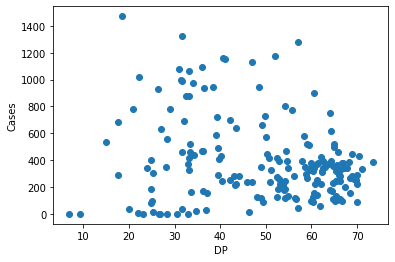

In [445]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-446-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


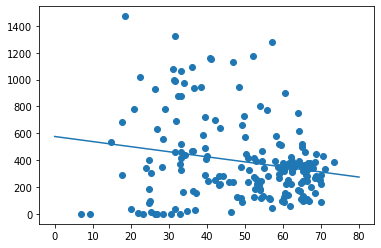

In [446]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-447-7c8942008501>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


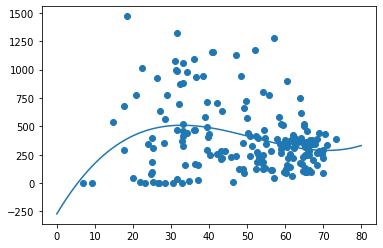

In [447]:
scaler = preprocessing.StandardScaler()
degree=3
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [448]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-448-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.08116583695816604

<ipython-input-449-c5886cd2b1c0>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


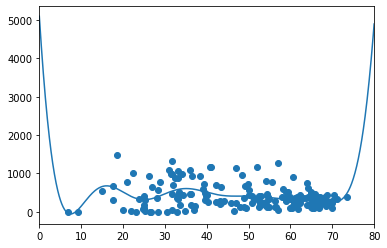

In [449]:
gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [450]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-450-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.132988997422952

# Analysis of Chicago with a delay of 7 days

In [451]:
df = pd.read_csv('Data/Chicago_Final_D7.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.tail()

,Date,Cases - Total,Date-1,Avg_DP
179,8/27/2020,353,8/20/2020,52.7
180,8/28/2020,377,8/21/2020,56.6
181,8/29/2020,222,8/22/2020,59.0
182,8/30/2020,90,8/23/2020,62.5
183,8/31/2020,342,8/24/2020,66.6


In [452]:
df.describe()

,Cases - Total,Avg_DP
count,184.000000,184.000000
mean,391.456522,47.847826
std,305.820491,15.995351
min,0.000000,6.800000
25%,181.250000,33.275000
50%,327.000000,51.600000
75%,475.000000,61.900000
max,1471.000000,73.500000


In [453]:
df.corr()

,Cases - Total,Avg_DP
Cases - Total,1.000000,-0.259817
Avg_DP,-0.259817,1.000000


Text(0, 0.5, 'Cases')

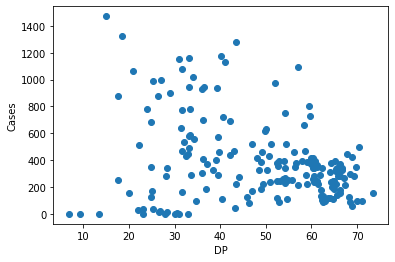

In [454]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-455-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


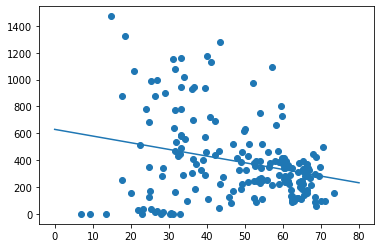

In [455]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-456-7c8942008501>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


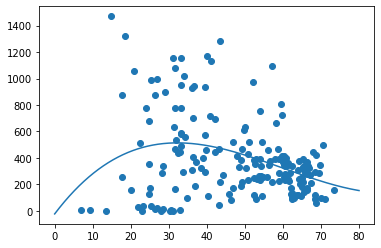

In [456]:
scaler = preprocessing.StandardScaler()
degree=3
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [457]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-457-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.10599582179945921

<ipython-input-458-fb157b280478>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


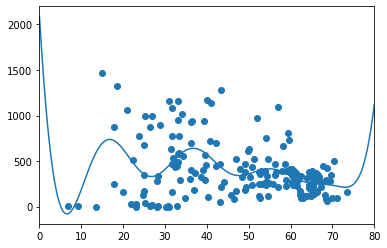

In [458]:
gauss_model = make_pipeline(GaussianFeatures(11),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [459]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-459-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.18455699342615028

## Analysis based on different DP temperature ranges ##

#### DP range between  1 - 20 degrees. ####

In [460]:
df = pd.read_csv('Data/Chicago_1_20_D7.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.head()

,Date,Cases - Total,Date-1,Avg_DP
0,3/5/2020,1,2/27/2020,13.4
1,3/6/2020,3,2/28/2020,6.8
2,3/7/2020,3,2/29/2020,9.2
3,3/20/2020,156,3/13/2020,20.0
4,3/28/2020,253,3/21/2020,17.7


In [461]:
df.corr()

,Cases - Total,Avg_DP
Cases - Total,1.000000,0.450543
Avg_DP,0.450543,1.000000


<ipython-input-462-687760e33dc2>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

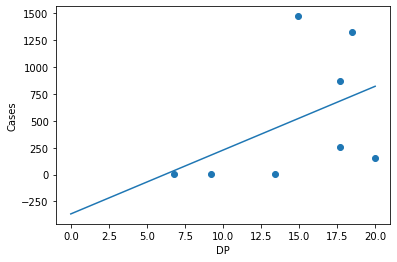

In [462]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 20, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  21 - 40 degrees. ####

In [463]:
df = pd.read_csv('Data/Chicago_21_40_D7.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.head()

,Date,Cases - Total,Date-1,Avg_DP
0,3/1/2020,0,2/23/2020,28.0
1,3/2/2020,0,2/24/2020,30.2
2,3/3/2020,0,2/25/2020,31.0
3,3/4/2020,0,2/26/2020,23.0
4,3/8/2020,3,3/1/2020,32.9


In [464]:
df.corr()

,Cases - Total,Avg_DP
Cases - Total,1.000000,0.226829
Avg_DP,0.226829,1.000000


<ipython-input-465-5925fe7adef9>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

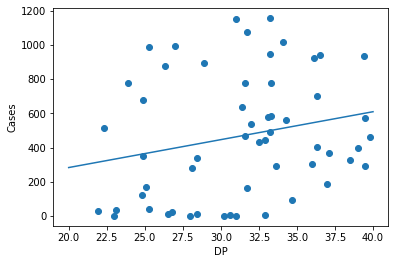

In [465]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(20, 40, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  41 - 60 degrees. ####

In [466]:
df = pd.read_csv('Data/Chicago_41_60_D7.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.head()

,Date,Cases - Total,Date-1,Avg_DP
0,3/16/2020,78,3/9/2020,46.4
1,3/26/2020,415,3/19/2020,48.0
2,4/2/2020,442,3/26/2020,42.2
3,4/3/2020,468,3/27/2020,43.1
4,4/4/2020,326,3/28/2020,50.2


In [467]:
df.corr()

,Cases - Total,Avg_DP
Cases - Total,1.000000,-0.050194
Avg_DP,-0.050194,1.000000


<ipython-input-468-9c12262b595c>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

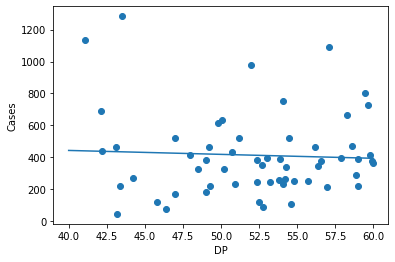

In [468]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(40, 60, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  61 - 80 degrees. ####

In [469]:
df = pd.read_csv('Data/Chicago_61_80_D7.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.head()

,Date,Cases - Total,Date-1,Avg_DP
0,5/30/2020,243,5/23/2020,61.3
1,5/31/2020,120,5/24/2020,64.0
2,6/1/2020,238,5/25/2020,64.3
3,6/2/2020,246,5/26/2020,64.9
4,6/3/2020,284,5/27/2020,65.8


In [470]:
df.corr()

,Cases - Total,Avg_DP
Cases - Total,1.000000,0.055814
Avg_DP,0.055814,1.000000


<ipython-input-471-01b50c46f339>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

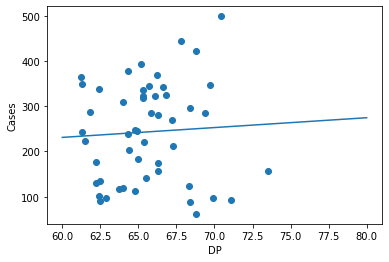

In [471]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(60, 80, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

# Analysis of chicago with 14 days of delay

In [472]:
df = pd.read_csv('Data/Chicago_Final_D14.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.head()

,Date,Cases - Total,Date-1,Avg_DP
0,3/1/2020,0,2/16/2020,21.8
1,3/2/2020,0,2/17/2020,29.9
2,3/3/2020,0,2/18/2020,26.6
3,3/4/2020,0,2/19/2020,4.8
4,3/5/2020,1,2/20/2020,-2.6


In [473]:
df.corr()

,Cases - Total,Avg_DP
Cases - Total,1.000000,-0.218504
Avg_DP,-0.218504,1.000000


Text(0, 0.5, 'Cases')

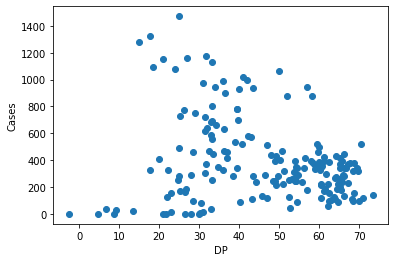

In [474]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-475-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


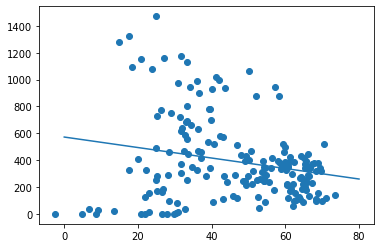

In [475]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-476-7c8942008501>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


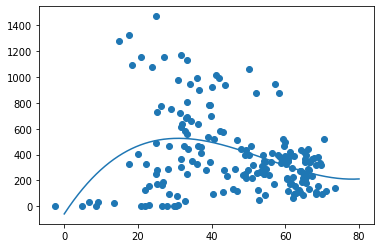

In [476]:
scaler = preprocessing.StandardScaler()
degree=3
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [477]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-477-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.14112047497529334

<ipython-input-478-c5886cd2b1c0>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


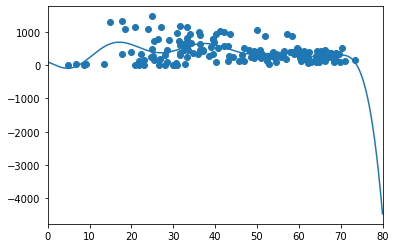

In [478]:
gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [479]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-479-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.21814193711624053

## Analysis based on different DP temperature ranges ##

#### DP range between  1 - 20 degrees. ####

In [480]:
df = pd.read_csv('Data/Chicago_1_20_D14.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.head()

,Date,Cases - Total,Date-1,Avg_DP
0,3/4/2020,0,2/19/2020,4.8
1,3/6/2020,3,2/21/2020,8.7
2,3/12/2020,21,2/27/2020,13.4
3,3/13/2020,33,2/28/2020,6.8
4,3/14/2020,31,2/29/2020,9.2


In [481]:
df.corr()

,Cases - Total,Avg_DP
Cases - Total,1.000000,0.655506
Avg_DP,0.655506,1.000000


<ipython-input-482-687760e33dc2>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

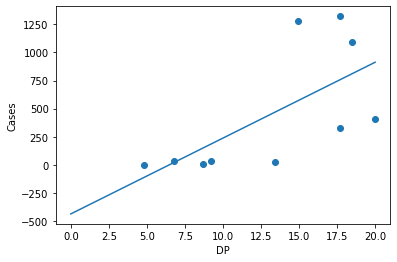

In [482]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 20, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  21 - 40 degrees. ####

In [483]:
df = pd.read_csv('Data/Chicago_21_40_D14.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.head()

,Date,Cases - Total,Date-1,Avg_DP
0,3/1/2020,0,2/16/2020,21.8
1,3/2/2020,0,2/17/2020,29.9
2,3/3/2020,0,2/18/2020,26.6
3,3/8/2020,3,2/23/2020,28.0
4,3/9/2020,5,2/24/2020,30.2


In [484]:
df.corr()

,Cases - Total,Avg_DP
Cases - Total,1.000000,0.244204
Avg_DP,0.244204,1.000000


<ipython-input-485-5925fe7adef9>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

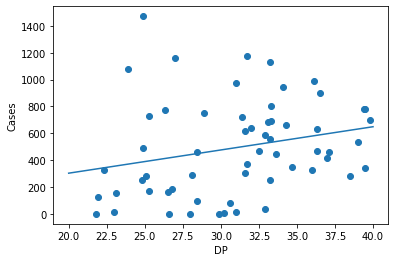

In [485]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(20, 40, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  41 - 60 degrees. ####

In [486]:
df = pd.read_csv('Data/Chicago_41_60_D14.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.head()

,Date,Cases - Total,Date-1,Avg_DP
0,3/23/2020,292,3/9/2020,46.4
1,4/2/2020,442,3/19/2020,48.0
2,4/9/2020,580,3/26/2020,42.2
3,4/10/2020,572,3/27/2020,43.1
4,4/11/2020,398,3/28/2020,50.2


In [487]:
df.corr()

,Cases - Total,Avg_DP
Cases - Total,1.000000,-0.149356
Avg_DP,-0.149356,1.000000


<ipython-input-488-9c12262b595c>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

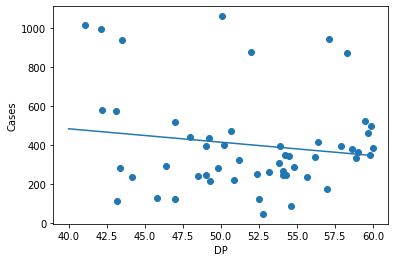

In [488]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(40, 60, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  61 - 80 degrees. ####

In [489]:
df = pd.read_csv('Data/Chicago_61_80_D14.csv')
y = df['Cases - Total']
x = df['Avg_DP']
df.head()

,Date,Cases - Total,Date-1,Avg_DP
0,6/6/2020,171,5/23/2020,61.3
1,6/7/2020,110,5/24/2020,64.0
2,6/8/2020,272,5/25/2020,64.3
3,6/9/2020,257,5/26/2020,64.9
4,6/10/2020,235,5/27/2020,65.8


In [490]:
df.corr()

,Cases - Total,Avg_DP
Cases - Total,1.000000,0.042641
Avg_DP,0.042641,1.000000


<ipython-input-491-01b50c46f339>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

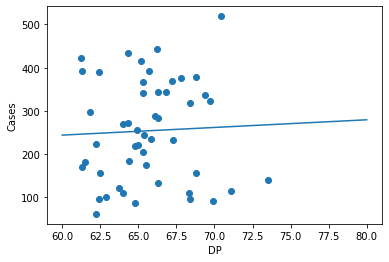

In [491]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(60, 80, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

### Cases Heatmap ###

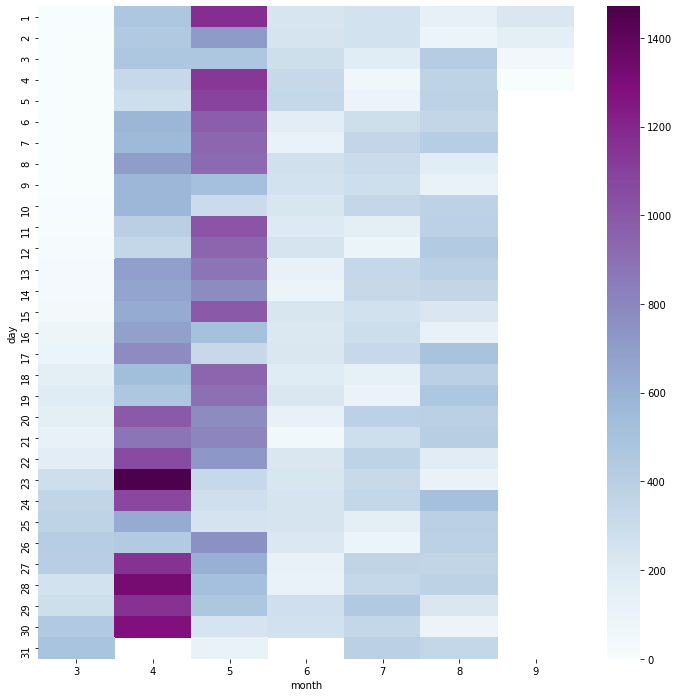

In [492]:
heat_data = pd.read_csv("Data/Chicago_Heat.csv")
heat_data.head()
heat_matrix = heat_data.pivot("day", "month", "Cases - Total")
heat_matrix
fig = plt.figure(figsize=(12,12))
heatmap = sns.heatmap(heat_matrix, cmap = 'BuPu')

### DP Heatmap ###

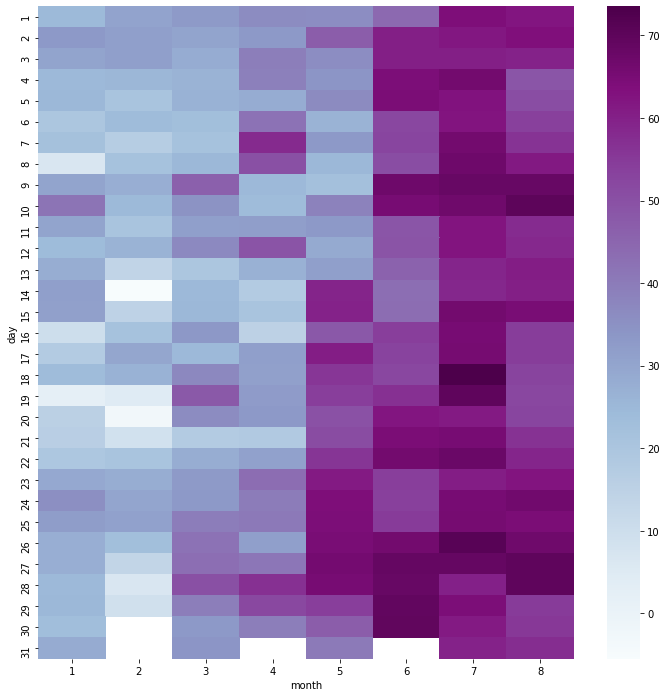

In [493]:
heat_data = pd.read_csv("Data/Chicago_Heat_DP.csv")
heat_data.head()
heat_matrix = heat_data.pivot("day", "month", "Avg_DP")
heat_matrix
fig = plt.figure(figsize=(12,12))
heatmap = sns.heatmap(heat_matrix, cmap = 'BuPu')

# London cases over time.

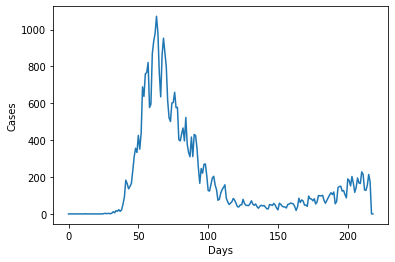

In [494]:
series = pd.read_csv('Data/London_Cases.csv')
series["Cases"].plot()
plt.xlabel("Days")
plt.ylabel("Cases")
plt.show()

# London DP over time

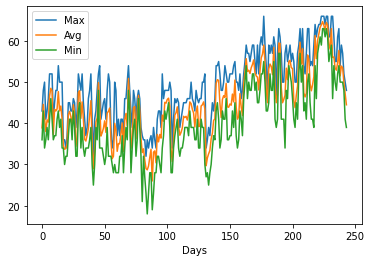

In [495]:
dseries = pd.read_csv('Data/LONDON_DP_INFO.csv')
dseries.plot()
plt.xlabel("Days")
plt.show()

# Analysis of london without delay.

In [496]:
df = pd.read_csv('Data/London_Final.csv')
y = df['New_Cases']
x = df['Avg_DP']
df.tail()


,date,total_cases,New_Cases,Day,Avg_DP
179,8/27/2020,39295,228,8/27/2020,53.9
180,8/28/2020,39509,214,8/28/2020,53.5
181,8/29/2020,39639,130,8/29/2020,49.9
182,8/30/2020,39767,128,8/30/2020,47.1
183,8/31/2020,39922,155,8/31/2020,44.5


In [497]:
df.describe()

,total_cases,New_Cases,Avg_DP
count,184.000000,184.000000,184.000000
mean,26659.989130,216.896739,46.285326
std,12215.072536,245.716673,8.718998
min,17.000000,4.000000,26.000000
25%,22019.000000,53.000000,40.800000
50%,32385.500000,108.500000,45.450000
75%,34594.000000,280.750000,52.975000
max,39922.000000,1072.000000,64.700000


In [498]:
df.corr() # Pearson Correlation

,total_cases,New_Cases,Avg_DP
total_cases,1.000000,-0.468332,0.668453
New_Cases,-0.468332,1.000000,-0.526556
Avg_DP,0.668453,-0.526556,1.000000


Text(0, 0.5, 'Cases')

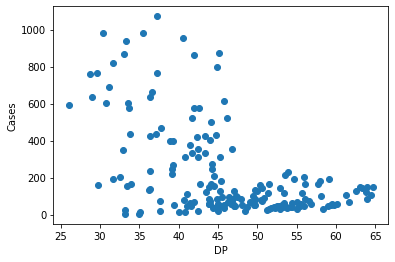

In [499]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-500-cf755118c67f>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


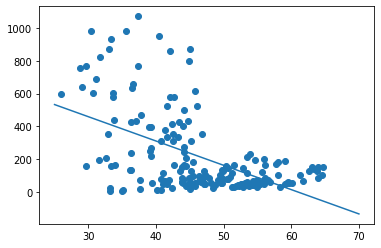

In [500]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(25, 70, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-501-60c39438cd81>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


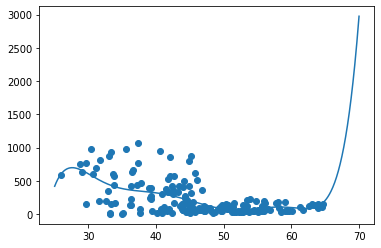

In [501]:
scaler = preprocessing.StandardScaler()
degree=7
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [502]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-502-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.34407790193400634

<ipython-input-503-8e09331286c4>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


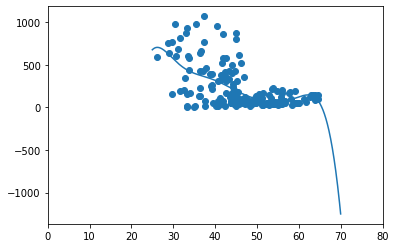

In [503]:
gauss_model = make_pipeline(GaussianFeatures(7),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [504]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-504-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.3385868460289696

<AxesSubplot:>

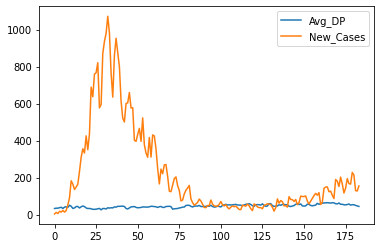

In [505]:
data_plot = df.loc[:,["Avg_DP","New_Cases"]]
data_plot.plot()

# Analysis of london with a delay of 2 days

**The dates in the data refer to the total cases and the DP values are associated with the delay (2,7,14) or past date values**

In [506]:
df = pd.read_csv('Data/London_Final_D2.csv')
y = df['New_Cases']
x = df['Avg_DP']
df.tail()


,Date,Avg_DP,date,total_cases,New_Cases
210,8/25/2020,57.7,8/27/2020,39295,228
211,8/26/2020,51.5,8/28/2020,39509,214
212,8/27/2020,53.9,8/29/2020,39639,130
213,8/28/2020,53.5,8/30/2020,39767,128
214,8/29/2020,49.9,8/31/2020,39922,155


In [507]:
df.describe()

,Avg_DP,total_cases,New_Cases
count,215.000000,215.000000,215.000000
mean,45.239535,22816.274419,185.683721
std,8.647077,14686.565857,239.667103
min,26.000000,0.000000,0.000000
25%,39.000000,4522.500000,40.500000
50%,44.800000,31119.000000,82.000000
75%,51.650000,34165.000000,210.500000
max,64.700000,39922.000000,1072.000000


In [508]:
df.corr()

,Avg_DP,total_cases,New_Cases
Avg_DP,1.000000,0.653668,-0.397462
total_cases,0.653668,1.000000,-0.138247
New_Cases,-0.397462,-0.138247,1.000000


Text(0, 0.5, 'Cases')

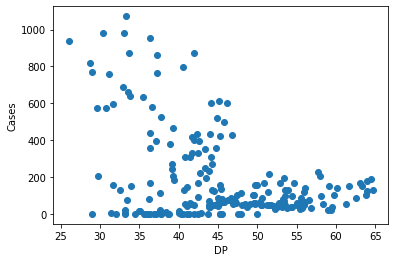

In [509]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-510-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


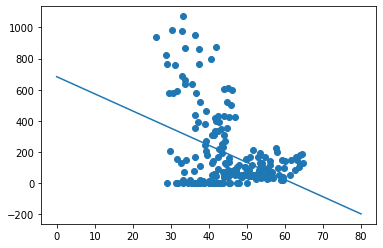

In [510]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-511-7c8942008501>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


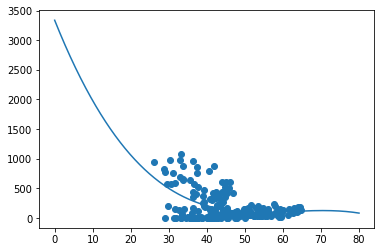

In [511]:
scaler = preprocessing.StandardScaler()
degree=3
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [512]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-512-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.22227849736430605

<ipython-input-513-a635246d4060>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


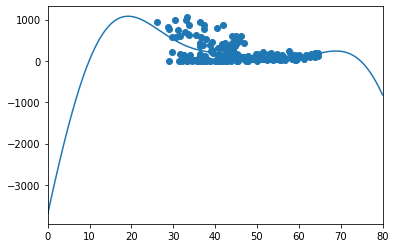

In [513]:
gauss_model = make_pipeline(GaussianFeatures(5),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [514]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-514-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.23197764641609608

# Analysis of london with a delay of 7 days

In [515]:
df = pd.read_csv('Data/London_Final_D7.csv')
y = df['New_Cases']
x = df['Avg_DP']
df.tail()

,date,total_cases,New_Cases,Date,Avg_DP
210,8/27/2020,39295,228,8/20/2020,56.0
211,8/28/2020,39509,214,8/21/2020,56.1
212,8/29/2020,39639,130,8/22/2020,53.4
213,8/30/2020,39767,128,8/23/2020,52.9
214,8/31/2020,39922,155,8/24/2020,54.7


In [516]:
df.describe()

,total_cases,New_Cases,Avg_DP
count,215.000000,215.000000,215.000000
mean,22816.274419,185.683721,44.980000
std,14686.565857,239.667103,8.562553
min,0.000000,0.000000,26.000000
25%,4522.500000,40.500000,39.000000
50%,31119.000000,82.000000,44.200000
75%,34165.000000,210.500000,51.050000
max,39922.000000,1072.000000,64.700000


In [517]:
df.corr()

,total_cases,New_Cases,Avg_DP
total_cases,1.000000,-0.138247,0.614889
New_Cases,-0.138247,1.000000,-0.388564
Avg_DP,0.614889,-0.388564,1.000000


Text(0, 0.5, 'Cases')

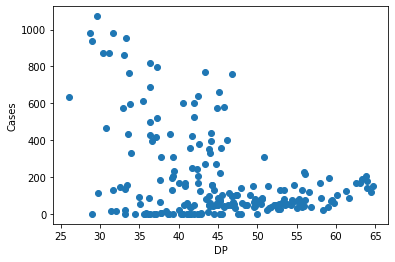

In [518]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-519-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


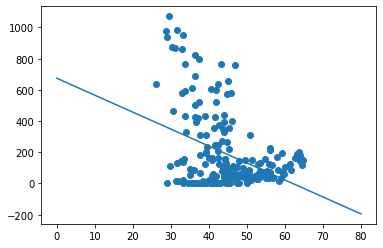

In [519]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-520-7c8942008501>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


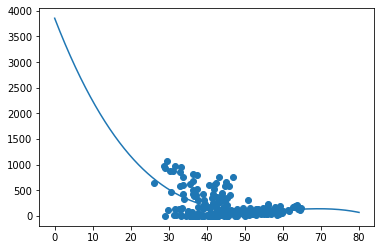

In [520]:
scaler = preprocessing.StandardScaler()
degree=3
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [521]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-521-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.23599811588560005

<ipython-input-522-e8e2d0d82575>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


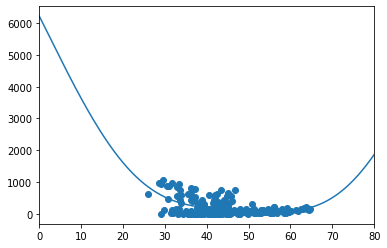

In [522]:
gauss_model = make_pipeline(GaussianFeatures(4),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [523]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-523-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.24298639917607145

## Analysis based on different DP temperature ranges ##

#### DP range between  21 - 40 degrees. ####

In [524]:
df = pd.read_csv('Data/London_21_40_D7.csv')
y = df['New_Cases']
x = df['Avg_DP']
df.head()

,date,total_cases,New_Cases,Date,Avg_DP
0,2/1/2020,0,0,1/25/2020,39.3
1,2/4/2020,0,0,1/28/2020,34.4
2,2/5/2020,0,0,1/29/2020,36.3
3,2/11/2020,1,1,2/4/2020,36.1
4,2/12/2020,1,0,2/5/2020,35.7


In [525]:
df.corr()

,total_cases,New_Cases,Avg_DP
total_cases,1.000000,0.272687,-0.026183
New_Cases,0.272687,1.000000,-0.424207
Avg_DP,-0.026183,-0.424207,1.000000


<ipython-input-526-5925fe7adef9>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

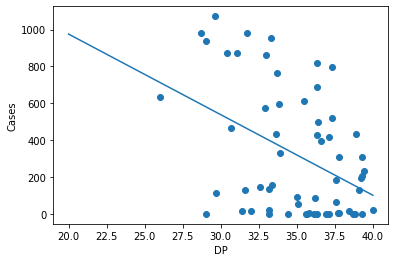

In [526]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(20, 40, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  41 - 60 degrees. ####

In [527]:
df = pd.read_csv('Data/London_41_60_D7.csv')
y = df['New_Cases']
x = df['Avg_DP']
df.head()

,date,total_cases,New_Cases,Date,Avg_DP
0,1/30/2020,0,0,1/23/2020,42.9
1,1/31/2020,0,0,1/24/2020,41.6
2,2/2/2020,0,0,1/26/2020,44.5
3,2/3/2020,0,0,1/27/2020,42.4
4,2/6/2020,0,0,1/30/2020,47.5


In [528]:
df.corr()

,total_cases,New_Cases,Avg_DP
total_cases,1.000000,-0.164069,0.486793
New_Cases,-0.164069,1.000000,-0.242423
Avg_DP,0.486793,-0.242423,1.000000


<ipython-input-529-9c12262b595c>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

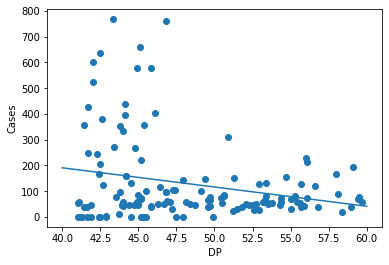

In [529]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(40, 60, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  61 - 80 degrees. ####

In [530]:
df = pd.read_csv('Data/London_61_80_D7.csv')
y = df['New_Cases']
x = df['Avg_DP']
df.head()

,date,total_cases,New_Cases,Date,Avg_DP
0,8/13/2020,37068,124,8/6/2020,61.3
1,8/16/2020,37387,87,8/9/2020,61.7
2,8/17/2020,37577,190,8/10/2020,63.3
3,8/18/2020,37758,181,8/11/2020,63.9
4,8/19/2020,37910,152,8/12/2020,64.7


In [531]:
df.corr()

,total_cases,New_Cases,Avg_DP
total_cases,1.000000,0.248850,0.483297
New_Cases,0.248850,1.000000,0.389557
Avg_DP,0.483297,0.389557,1.000000


<ipython-input-532-01b50c46f339>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

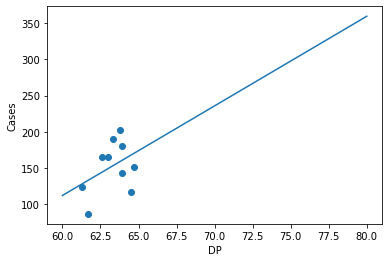

In [532]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(60, 80, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

# Analysis of london with 14 days of delay

In [533]:
df = pd.read_csv('Data/London_Final_D14.csv')
y = df['New_Cases']
x = df['Avg_DP']
df.tail()

,date,total_cases,New_Cases,Date,Avg_DP
210,8/27/2020,39295,228,8/13/2020,63.8
211,8/28/2020,39509,214,8/14/2020,62.6
212,8/29/2020,39639,130,8/15/2020,64.5
213,8/30/2020,39767,128,8/16/2020,63.9
214,8/31/2020,39922,155,8/17/2020,59.1


In [534]:
df.corr()

,total_cases,New_Cases,Avg_DP
total_cases,1.000000,-0.138247,0.573898
New_Cases,-0.138247,1.000000,-0.331892
Avg_DP,0.573898,-0.331892,1.000000


Text(0, 0.5, 'Cases')

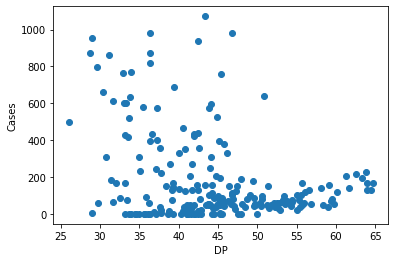

In [535]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-536-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


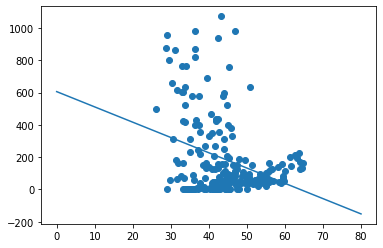

In [536]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-537-7c8942008501>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


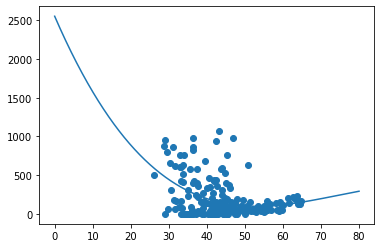

In [537]:
scaler = preprocessing.StandardScaler()
degree=3
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [538]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-538-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.16290379685102252

<ipython-input-539-5efdf2b34d6e>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


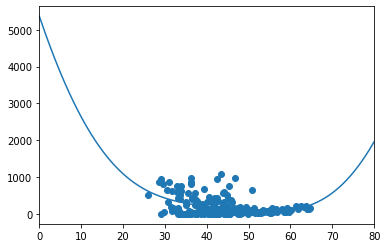

In [539]:
gauss_model = make_pipeline(GaussianFeatures(3),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [540]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-540-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.1647203887051495

## Analysis based on different DP temperature ranges ##

#### DP range between  21 - 40 degrees. ####

In [541]:
df = pd.read_csv('Data/London_21_40_D14.csv')
y = df['New_Cases']
x = df['Avg_DP']
df.head()

,date,total_cases,New_Cases,Date,Avg_DP
0,2/1/2020,0,0,1/18/2020,34.6
1,2/2/2020,0,0,1/19/2020,33.7
2,2/3/2020,0,0,1/20/2020,33.9
3,2/4/2020,0,0,1/21/2020,35.0
4,2/8/2020,0,0,1/25/2020,39.3


In [542]:
df.corr()

,total_cases,New_Cases,Avg_DP
total_cases,1.000000,0.235455,-0.079412
New_Cases,0.235455,1.000000,-0.334193
Avg_DP,-0.079412,-0.334193,1.000000


<ipython-input-543-5925fe7adef9>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

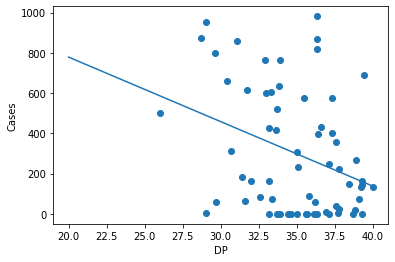

In [543]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(20, 40, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  41 - 60 degrees. ####

In [544]:
df = pd.read_csv('Data/London_41_60_D14.csv')
y = df['New_Cases']
x = df['Avg_DP']
df.head()

,date,total_cases,New_Cases,Date,Avg_DP
0,1/30/2020,0,0,1/16/2020,44.2
1,1/31/2020,0,0,1/17/2020,41.0
2,2/5/2020,0,0,1/22/2020,42.1
3,2/6/2020,0,0,1/23/2020,42.9
4,2/7/2020,0,0,1/24/2020,41.6


In [545]:
df.corr()

,total_cases,New_Cases,Avg_DP
total_cases,1.000000,-0.172020,0.467586
New_Cases,-0.172020,1.000000,-0.179487
Avg_DP,0.467586,-0.179487,1.000000


<ipython-input-546-9c12262b595c>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

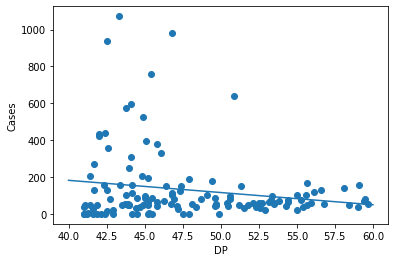

In [546]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(40, 60, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  61 - 80 degrees. ####

In [547]:
df = pd.read_csv('Data/London_61_80_D14.csv')
y = df['New_Cases']
x = df['Avg_DP']
df.head()

,date,total_cases,New_Cases,Date,Avg_DP
0,8/20/2020,38113,203,8/6/2020,61.3
1,8/23/2020,38539,143,8/9/2020,61.7
2,8/24/2020,38734,195,8/10/2020,63.3
3,8/25/2020,38902,168,8/11/2020,63.9
4,8/26/2020,39067,165,8/12/2020,64.7


In [548]:
df.corr()

,total_cases,New_Cases,Avg_DP
total_cases,1.000000,-0.276250,0.682146
New_Cases,-0.276250,1.000000,-0.300154
Avg_DP,0.682146,-0.300154,1.000000


<ipython-input-549-01b50c46f339>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

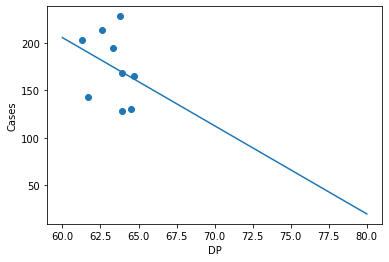

In [549]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(60, 80, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

### Cases Heatmap ###

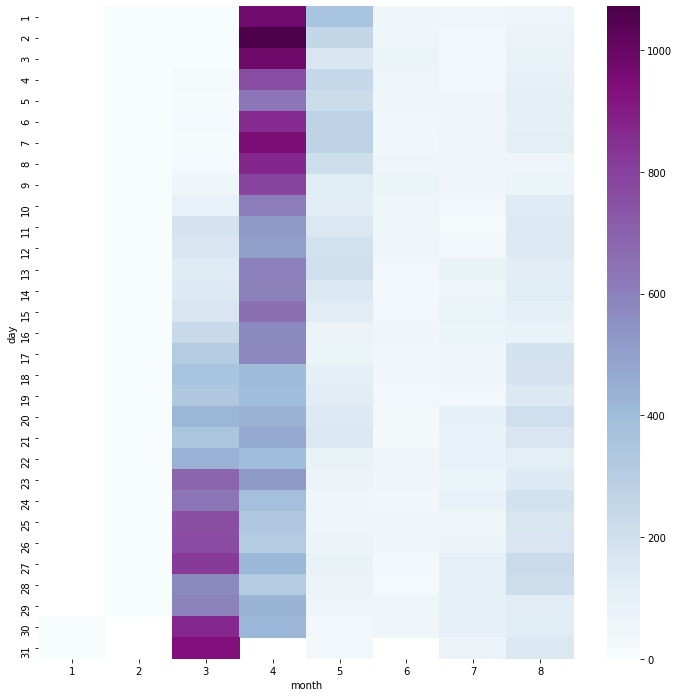

In [550]:
heat_data = pd.read_csv("Data/London_Heat.csv")
heat_data.head()
heat_matrix = heat_data.pivot("day", "month", "New_Cases")
heat_matrix
fig = plt.figure(figsize=(12,12))
heatmap = sns.heatmap(heat_matrix, cmap = 'BuPu')

### DP Heatmap ###

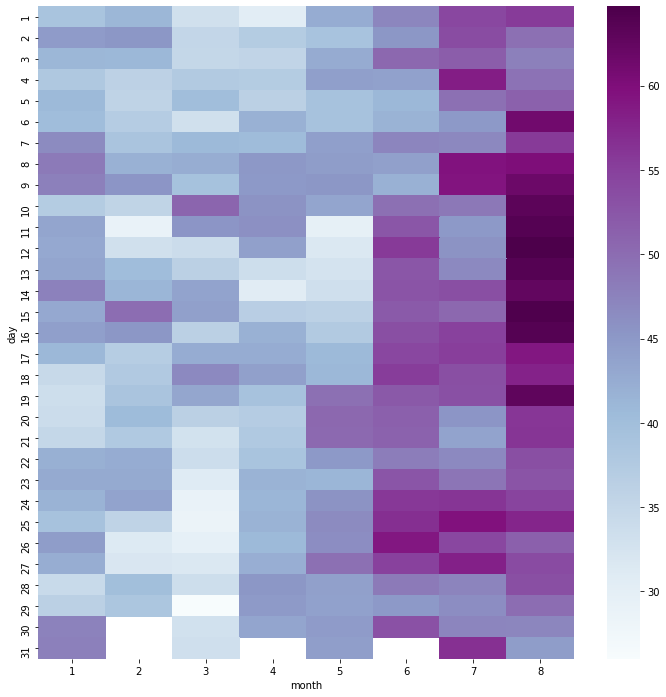

In [551]:
heat_data = pd.read_csv("Data/London_Heat_DP.csv")
heat_data.head()
heat_matrix = heat_data.pivot("day", "month", "Avg")
heat_matrix
fig = plt.figure(figsize=(12,12))
heatmap = sns.heatmap(heat_matrix, cmap = 'BuPu')

# New York cases over time

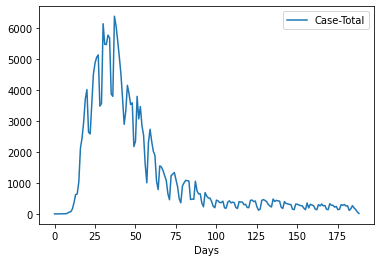

In [552]:
series = pd.read_csv('Data/NY_Cases.csv')
series.plot()
plt.xlabel("Days")
plt.show()

# New York DP over time

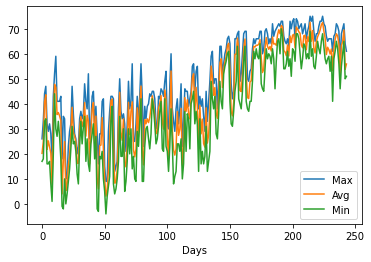

In [553]:
dseries = pd.read_csv('Data/NY_DP_INFO.csv')
dseries.plot()
plt.xlabel("Days")
plt.show()

# Analysis of New York without delay.

In [554]:
df = pd.read_csv('Data/NY_Final.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.tail()


,Date,Case-Total,Day,Avg_DP
180,8/27/2020,254,8/27/2020,63.3
181,8/28/2020,262,8/28/2020,64.8
182,8/29/2020,114,8/29/2020,69.5
183,8/30/2020,166,8/30/2020,53.8
184,8/31/2020,266,8/31/2020,55.9


In [555]:
df.describe()

,Case-Total,Avg_DP
count,185.000000,185.000000
mean,1249.621622,48.657297
std,1605.699474,16.616468
min,0.000000,8.500000
25%,262.000000,35.700000
50%,417.000000,52.100000
75%,1551.000000,63.400000
max,6377.000000,72.600000


In [556]:
df.corr() # Pearson Correlation

,Case-Total,Avg_DP
Case-Total,1.000000,-0.514356
Avg_DP,-0.514356,1.000000


Text(0, 0.5, 'Cases')

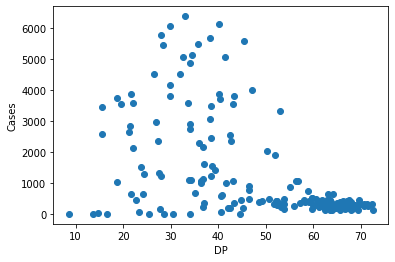

In [557]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-558-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


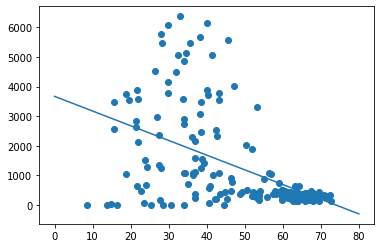

In [558]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-559-60c39438cd81>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


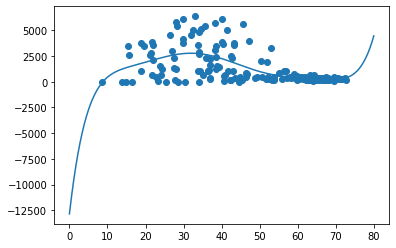

In [559]:
scaler = preprocessing.StandardScaler()
degree=7
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [560]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-560-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.37458696583497497

<ipython-input-561-c5886cd2b1c0>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


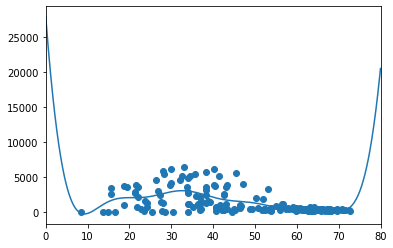

In [561]:
gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [562]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-562-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.382355782831477

<AxesSubplot:>

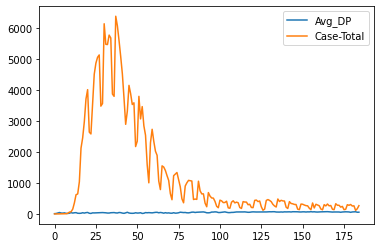

In [563]:
data_plot = df.loc[:,["Avg_DP","Case-Total"]]
data_plot.plot()

# Analysis of New York with a delay of 2 days

**The dates in the data refer to the total cases and the DP values are associated with the delay (2,7,14) or past date values**

In [564]:
df = pd.read_csv('Data/NY_Final_D2.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.tail()


,Date,Case-Total,Date-1,Avg_DP
180,8/27/2020,254,8/25/2020,63.9
181,8/28/2020,262,8/26/2020,51.8
182,8/29/2020,114,8/27/2020,63.3
183,8/30/2020,166,8/28/2020,64.8
184,8/31/2020,266,8/29/2020,69.5


In [565]:
df.describe()

,Case-Total,Avg_DP
count,185.000000,185.000000
mean,1249.621622,48.254595
std,1605.699474,16.939290
min,0.000000,8.300000
25%,262.000000,34.500000
50%,417.000000,51.800000
75%,1551.000000,63.400000
max,6377.000000,72.600000


In [566]:
df.corr()

,Case-Total,Avg_DP
Case-Total,1.000000,-0.498881
Avg_DP,-0.498881,1.000000


Text(0, 0.5, 'Cases')

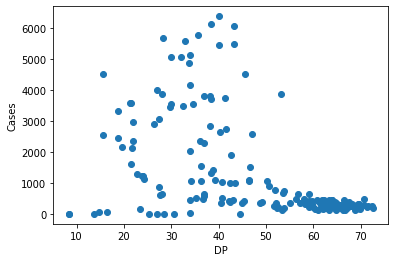

In [567]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-568-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


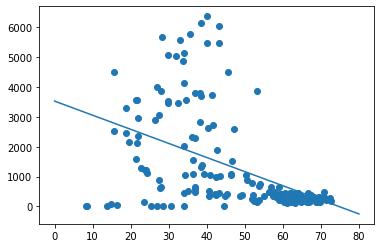

In [568]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-569-60c39438cd81>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


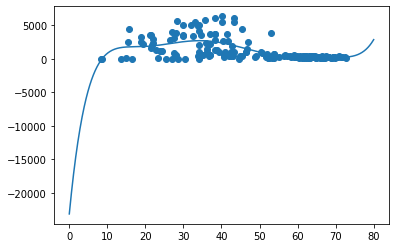

In [569]:
scaler = preprocessing.StandardScaler()
degree=7
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [570]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-570-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.38564427784974187

<ipython-input-571-c5886cd2b1c0>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


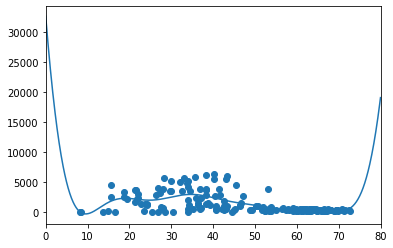

In [571]:
gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [572]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-572-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.39391109586209083

# Analysis of New York with a delay of 7 days

In [573]:
df = pd.read_csv('Data/NY_Final_D7.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.tail()

,Date,Case-Total,Date-1,Avg_DP
180,8/27/2020,254,8/20/2020,53.3
181,8/28/2020,262,8/21/2020,62.1
182,8/29/2020,114,8/22/2020,65.7
183,8/30/2020,166,8/23/2020,68.0
184,8/31/2020,266,8/24/2020,67.1


In [574]:
df.describe()

,Case-Total,Avg_DP
count,185.000000,185.000000
mean,1249.621622,47.257297
std,1605.699474,17.287001
min,0.000000,5.700000
25%,262.000000,34.000000
50%,417.000000,47.100000
75%,1551.000000,63.000000
max,6377.000000,72.600000


In [575]:
df.corr()

,Case-Total,Avg_DP
Case-Total,1.000000,-0.465641
Avg_DP,-0.465641,1.000000


Text(0, 0.5, 'Cases')

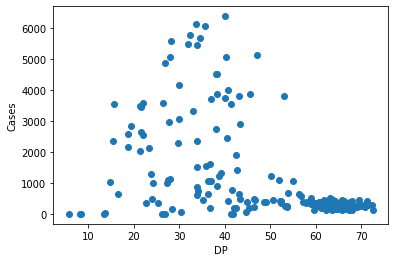

In [576]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-577-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


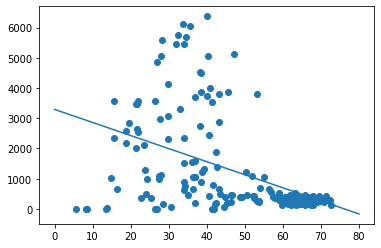

In [577]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-578-60c39438cd81>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


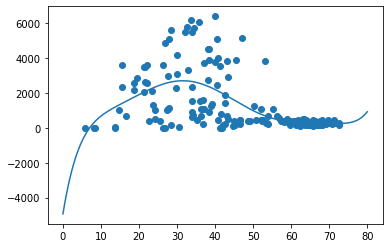

In [578]:
scaler = preprocessing.StandardScaler()
degree=7
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [579]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-579-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.3639878765616654

<ipython-input-580-c5886cd2b1c0>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


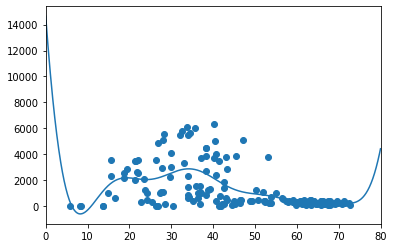

In [580]:
gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [581]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-581-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.37994247981075124

## Analysis based on different DP temperature ranges ##

#### DP range between  1 - 20 degrees. ####

In [582]:
df = pd.read_csv('Data/NY_1_20_D7.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.head()

,Date,Case-Total,Date-1,Avg_DP
0,2/29/2020,1,2/22/2020,5.7
1,3/1/2020,0,2/23/2020,13.6
2,3/6/2020,8,2/28/2020,8.3
3,3/7/2020,7,2/29/2020,8.5
4,3/8/2020,21,3/1/2020,13.7


In [583]:
df.corr()

,Case-Total,Avg_DP
Case-Total,1.000000,0.732633
Avg_DP,0.732633,1.000000


<ipython-input-584-687760e33dc2>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

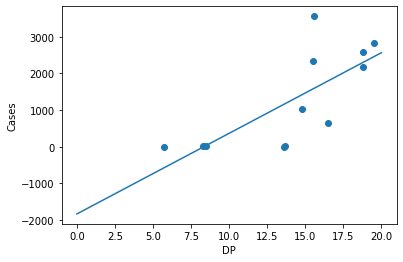

In [584]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 20, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  21 - 40 degrees. ####

In [585]:
df = pd.read_csv('Data/NY_21_40_D7.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.head()

,Date,Case-Total,Date-1,Avg_DP
0,3/2/2020,0,2/24/2020,26.3
1,3/5/2020,3,2/27/2020,26.9
2,3/9/2020,58,3/2/2020,30.5
3,3/11/2020,155,3/4/2020,28.5
4,3/12/2020,357,3/5/2020,25.4


In [586]:
df.corr()

,Case-Total,Avg_DP
Case-Total,1.000000,0.062065
Avg_DP,0.062065,1.000000


<ipython-input-587-5925fe7adef9>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

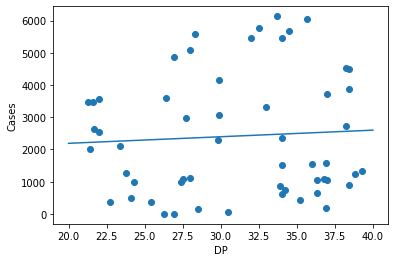

In [587]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(20, 40, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  41 - 60 degrees. ####

In [588]:
df = pd.read_csv('Data/NY_41_60_D7.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.head()

,Date,Case-Total,Date-1,Avg_DP
0,3/3/2020,2,2/25/2020,41.3
1,3/4/2020,5,2/26/2020,41.9
2,3/10/2020,70,3/3/2020,44.6
3,3/27/2020,5129,3/20/2020,47.1
4,4/5/2020,3793,3/29/2020,43.2


In [589]:
df.corr()

,Case-Total,Avg_DP
Case-Total,1.000000,-0.283003
Avg_DP,-0.283003,1.000000


<ipython-input-590-9c12262b595c>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

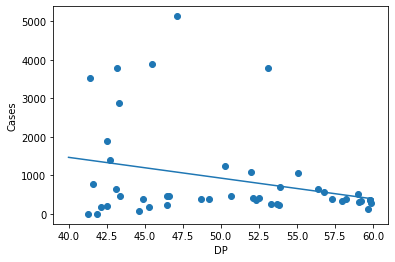

In [590]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(40, 60, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  61 - 80 degrees. ####

In [591]:
df = pd.read_csv('Data/NY_61_80_D7.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.head()

,Date,Case-Total,Date-1,Avg_DP
0,6/4/2020,510,5/28/2020,63.2
1,6/5/2020,404,5/29/2020,64.2
2,6/12/2020,410,6/5/2020,66.3
3,6/13/2020,196,6/6/2020,61.9
4,6/17/2020,356,6/10/2020,62.0


In [592]:
df.corr()

,Case-Total,Avg_DP
Case-Total,1.00000,-0.13448
Avg_DP,-0.13448,1.00000


<ipython-input-593-01b50c46f339>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

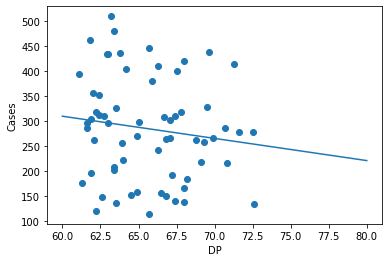

In [593]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(60, 80, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

# Analysis of New York with 14 days of delay

In [594]:
df = pd.read_csv('Data/NY_Final_D14.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.head()

,Date-1,Avg_DP,Date,Case-Total
0,2/15/2020,6.0,2/29/2020,1
1,2/16/2020,23.3,3/1/2020,0
2,2/17/2020,23.5,3/2/2020,0
3,2/18/2020,34.5,3/3/2020,2
4,2/19/2020,21.6,3/4/2020,5


In [595]:
df.corr()

,Avg_DP,Case-Total
Avg_DP,1.000000,-0.432734
Case-Total,-0.432734,1.000000


Text(0, 0.5, 'Cases')

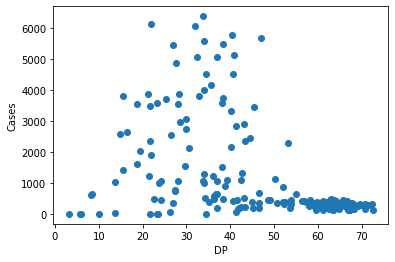

In [596]:
plt.scatter(x,y)
plt.xlabel('DP')
plt.ylabel('Cases')

<ipython-input-597-fc0b3cfde0a1>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


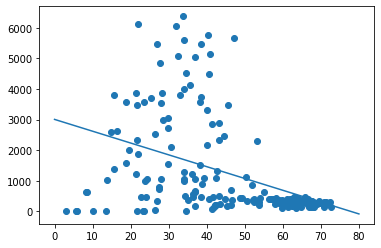

In [597]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

<ipython-input-598-60c39438cd81>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.fit(x[:, np.newaxis],y)


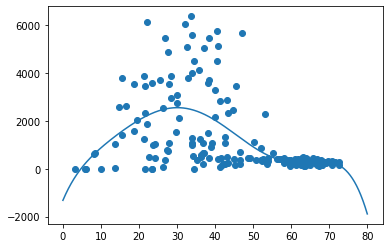

In [598]:
scaler = preprocessing.StandardScaler()
degree=7
polyreg_scaled=make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(x[:, np.newaxis],y)
yfit = polyreg_scaled.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [599]:
polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient

<ipython-input-599-14b3bed20b42>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  polyreg_scaled.score(x[:, np.newaxis], y) # R Square coefficient


0.34050093385786706

<ipython-input-600-c5886cd2b1c0>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.fit(x[:, np.newaxis], y)


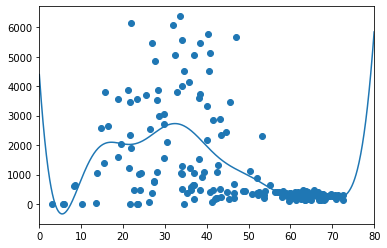

In [600]:
gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 80);

In [601]:
gauss_model.score(x[:, np.newaxis], y)

<ipython-input-601-3171f23d4d43>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gauss_model.score(x[:, np.newaxis], y)


0.3508034677394277

## Analysis based on different DP temperature ranges ##

#### DP range between  1 - 20 degrees. ####

In [602]:
df = pd.read_csv('Data/NY_1_20_D14.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.head()

,Date-1,Avg_DP,Date,Case-Total
0,2/15/2020,6.0,2/29/2020,1
1,2/20/2020,10.1,3/5/2020,3
2,2/21/2020,3.1,3/6/2020,8
3,2/22/2020,5.7,3/7/2020,7
4,2/23/2020,13.6,3/8/2020,21


In [603]:
df.corr()

,Avg_DP,Case-Total
Avg_DP,1.000000,0.754347
Case-Total,0.754347,1.000000


<ipython-input-604-687760e33dc2>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

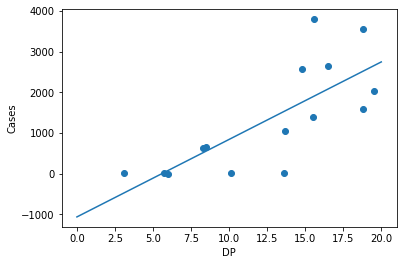

In [604]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 20, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  21 - 40 degrees. ####

In [605]:
df = pd.read_csv('Data/NY_21_40_D14.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.head()

,Date-1,Avg_DP,Date,Case-Total
0,2/16/2020,23.3,3/1/2020,0
1,2/17/2020,23.5,3/2/2020,0
2,2/18/2020,34.5,3/3/2020,2
3,2/19/2020,21.6,3/4/2020,5
4,2/24/2020,26.3,3/9/2020,58


In [606]:
df.corr()

,Avg_DP,Case-Total
Avg_DP,1.000000,0.023222
Case-Total,0.023222,1.000000


<ipython-input-607-5925fe7adef9>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

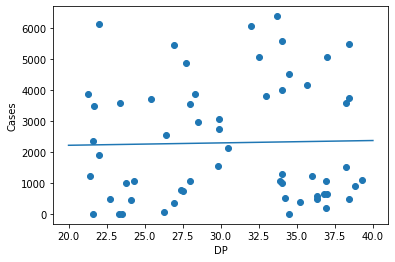

In [607]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(20, 40, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  41 - 60 degrees. ####

In [608]:
df = pd.read_csv('Data/NY_41_60_D14.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.head()

,Date-1,Avg_DP,Date,Case-Total
0,2/25/2020,41.3,3/10/2020,70
1,2/26/2020,41.9,3/11/2020,155
2,3/3/2020,44.6,3/17/2020,2453
3,3/20/2020,47.1,4/3/2020,5676
4,3/29/2020,43.2,4/12/2020,2890


In [609]:
df.corr()

,Avg_DP,Case-Total
Avg_DP,1.000000,-0.299308
Case-Total,-0.299308,1.000000


<ipython-input-610-9c12262b595c>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

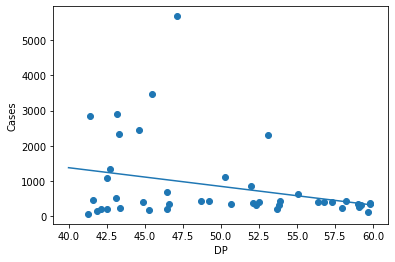

In [610]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(40, 60, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

#### DP range between  61 - 80 degrees. ####

In [611]:
df = pd.read_csv('Data/NY_61_80_D14.csv')
y = df['Case-Total']
x = df['Avg_DP']
df.head()

,Date-1,Avg_DP,Date,Case-Total
0,5/28/2020,63.2,6/11/2020,368
1,5/29/2020,64.2,6/12/2020,410
2,6/5/2020,66.3,6/19/2020,361
3,6/6/2020,61.9,6/20/2020,206
4,6/10/2020,62.0,6/24/2020,382


In [612]:
df.corr()

,Avg_DP,Case-Total
Avg_DP,1.000000,-0.119923
Case-Total,-0.119923,1.000000


<ipython-input-613-01b50c46f339>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis], y)


Text(0, 0.5, 'Cases')

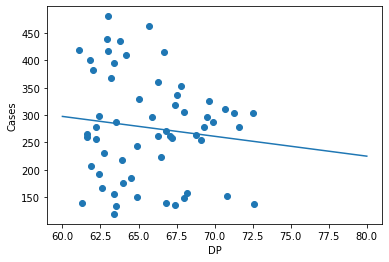

In [613]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(60, 80, 500)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.xlabel('DP')
plt.ylabel('Cases')

### Cases Heatmap ###

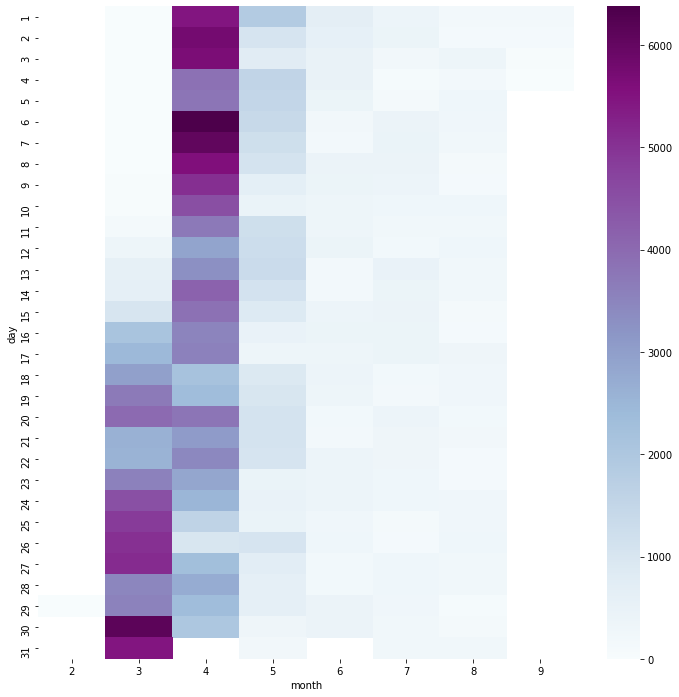

In [614]:
heat_data = pd.read_csv("Data/NY_Heat.csv")
heat_data.head()
heat_matrix = heat_data.pivot("day", "month", "Case-Total")
heat_matrix
fig = plt.figure(figsize=(12,12))
heatmap = sns.heatmap(heat_matrix, cmap = 'BuPu')

### DP Heatmap ###

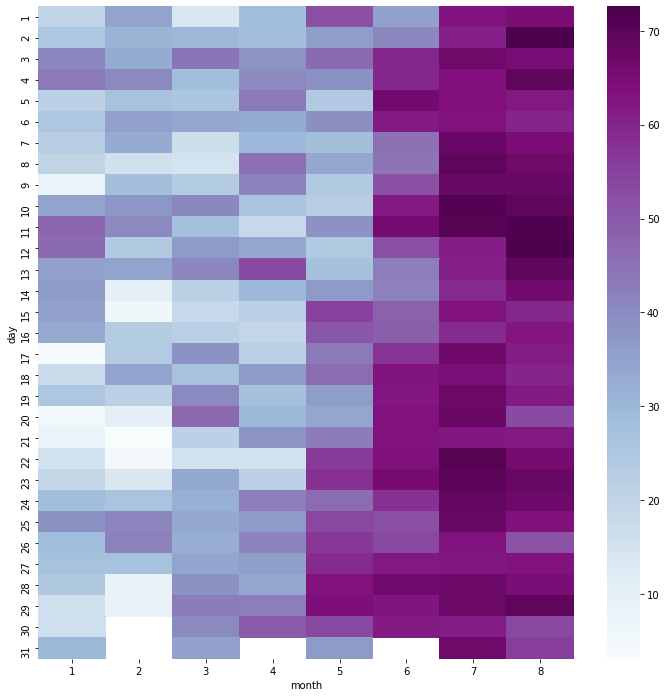

In [615]:
heat_data = pd.read_csv("Data/NY_Heat_DP.csv")
heat_data.head()
heat_matrix = heat_data.pivot("day", "month", "Avg_DP")
heat_matrix
fig = plt.figure(figsize=(12,12))
heatmap = sns.heatmap(heat_matrix, cmap = 'BuPu')

## Analysis of relationship between altitude and disease spread rate. ##

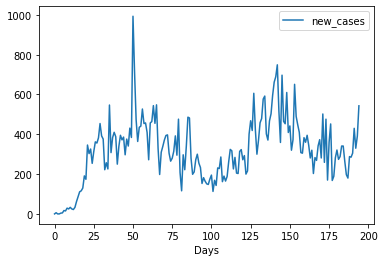

In [616]:
series = pd.read_csv('Data/Colorado_State_Cases.csv')
series.plot()
plt.xlabel("Days")
plt.show()

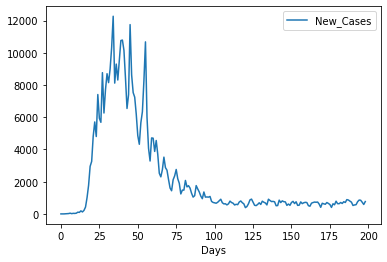

In [617]:
series = pd.read_csv('Data/NY_State_Cases.csv')
series.plot()
plt.xlabel("Days")
plt.show()

The result is surprising that the relation between the daily number of cases and the dew point temperature is negative in nature if we do not consider any other factor. If we remove the extremely high number of daily cases hat were recorded at the time when the disease had just started to spread then we will get a lightly positive relationship between the daily number of cases and the dew point temperature. The graphs also show that governments did a good job as he virus is spreading at a much slower rate than the time when it first started to spread It is also found that altitude also has an impact on how the disease spreads. Well except for Colorado state as it seems to have hds a second wave of disease spread. The impact is either makes it easier for the people to get infected or that the disease can spread much faster at higher altitude regions. 